# Classic CNN Models
* AlexNet
* VGG16
* GoogLeNet
* ResNet50
* https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py

## == Sequential ==

### Getting started with the Keras Sequential model
* The `Sequential` model is a linear stack of layers.
* https://keras.io/getting-started/sequential-model-guide/

```python
model_AlexNet = Sequential(name='AlexNet')
```


### Model visualization & Training history visualization
* https://keras.io/visualization/

```python
from keras.utils import plot_model
plot_model(model, to_file='model.png')
```
* `plot_model` takes four optional arguments:

* `show_shapes` (defaults to False) controls whether output shapes are shown in the graph.
* `show_layer_names` (defaults to True) controls whether layer names are shown in the graph.
* `expand_nested` (defaults to False) controls whether to expand nested models into clusters in the graph.
* `dpi` (defaults to 96) controls image dpi.

### Compilation
* Before training a model, you need to configure the learning process, which is done via the `compile` method.
* It receives three arguments: An `optimizer`, A `loss function`, A list of `metrics`

### Training
* Keras models are trained on `Numpy arrays` of `input data` and `labels`.
* For training a model, you will typically use the `fit` function.
* https://keras.io/models/sequential/#fit

```python
# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)
```

## == Model (functional API) ==
* https://keras.io/models/model/
* In the functional API, given some input tensor(s) and output tensor(s), you can instantiate a `Model` via:

```python
from keras.models import Model
from keras.layers import Input, Dense
a = Input(shape=(32,))
b = Dense(32)(a)
model = Model(inputs=a, outputs=b, name= 'Model_name')
```
* This model will include all layers required in the computation of `b` given `a`.
* In the case of multi-input or multi-output models, you can use lists as well:

```python
model = Model(inputs=[a1, a2], outputs=[b1, b2, b3])
```


In [1]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense,Flatten,Dropout, Input, BatchNormalization, concatenate, ZeroPadding2D, add
from keras.layers.convolutional import Conv2D,MaxPooling2D, AveragePooling2D

from keras.utils import plot_model

Using TensorFlow backend.
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

In [2]:
# AlexNet
model_AlexNet = Sequential(name='AlexNet')
model_AlexNet.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(227,227,3),padding='valid',activation='relu',kernel_initializer='uniform'))
# Param = 11*11 *96 kernals *3 prior_channels + 96bias = 34944
model_AlexNet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model_AlexNet.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param = 5*5*256*96 +256 = 614656
model_AlexNet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model_AlexNet.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param = 3*3*384*256 + 384 = 885120
model_AlexNet.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param = 3*3*384*384 +384 = 1327488
model_AlexNet.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param = 3*3*256*384 +256 = 884992
model_AlexNet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model_AlexNet.add(Flatten()) # output shape = ,9216
model_AlexNet.add(Dense(4096,activation='relu'))
# Param = 9216*4096 + 4096 = 37752832
model_AlexNet.add(Dropout(0.5))
model_AlexNet.add(Dense(4096,activation='relu'))
# Param = 4096*4096 + 4096 = 16781312
model_AlexNet.add(Dropout(0.5))
model_AlexNet.add(Dense(1000,activation='softmax'))
# Param = 4096*1000 + 1000 = 4097000
model_AlexNet.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model_AlexNet.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 256)       8849

In [3]:
# VGG16
model_VGG16 = Sequential(name='VGG16')
model_VGG16.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(224,224,3),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*64*3 + 64 = 1792
model_VGG16.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*64*64 + 64 = 36928
model_VGG16.add(MaxPooling2D(pool_size=(2,2)))
model_VGG16.add(Conv2D(128,(3,2),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*2*128*64 + 128 = 49280
model_VGG16.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*128*128  + 128 = 147584
model_VGG16.add(MaxPooling2D(pool_size=(2,2)))
model_VGG16.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*256*128 + 256 = 295168
model_VGG16.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*256*256 + 256 = 590080
model_VGG16.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*256*256 + 256 = 590080
model_VGG16.add(MaxPooling2D(pool_size=(2,2)))
model_VGG16.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*512*256 + 512 = 1180160
model_VGG16.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*512*512 +512 = 2359808
model_VGG16.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*512*512 +512 = 2359808
model_VGG16.add(MaxPooling2D(pool_size=(2,2)))
model_VGG16.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*512*512 +512 = 2359808
model_VGG16.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*512*512 +512 = 2359808
model_VGG16.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# Param =  3*3*512*512 +512 = 2359808
model_VGG16.add(MaxPooling2D(pool_size=(2,2))) # output shape = , 7,7,512
model_VGG16.add(Flatten())  # output shape = ,25088
model_VGG16.add(Dense(4096,activation='relu'))
# Param =  25088*4096 + 4096 = 102764544
model_VGG16.add(Dropout(0.5))
model_VGG16.add(Dense(4096,activation='relu'))
# Param =  4096*4096 + 4096 = 16781312
model_VGG16.add(Dropout(0.5))
model_VGG16.add(Dense(1000,activation='softmax'))
# Param =  4096*1000 + 1000 = 4097000
model_VGG16.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model_VGG16.summary()

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 128)     49280     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 256)       295168

In [4]:
# GoogLeNet
def Conv2d_BN(x, nb_filter,kernel_size, padding='same',strides=(1,1),name=None, batch_normalization=False):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
 
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    if batch_normalization:
        x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
 
def Inception(x,nb_filter):
    branch1x1 = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
 
    branch3x3 = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
    branch3x3 = Conv2d_BN(branch3x3,nb_filter,(3,3), padding='same',strides=(1,1),name=None)
 
    branch5x5 = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
    branch5x5 = Conv2d_BN(branch5x5,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
 
    branchpool = MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same')(x)
    branchpool = Conv2d_BN(branchpool,nb_filter,(1,1),padding='same',strides=(1,1),name=None)
 
    x = concatenate([branch1x1,branch3x3,branch5x5,branchpool],axis=3)

    return x
 
inpt = Input(shape=(224,224,3))
x = Conv2d_BN(inpt,64,(7,7),strides=(2,2),padding='same')
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Conv2d_BN(x,192,(3,3),strides=(1,1),padding='same')
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Inception(x,64)
x = Inception(x,120)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Inception(x,128)
x = Inception(x,128)
x = Inception(x,128)
x = Inception(x,132)
x = Inception(x,208)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Inception(x,208)
x = Inception(x,256)
x = AveragePooling2D(pool_size=(7,7),strides=(7,7),padding='same')(x)
x = Dropout(0.4)(x)
x = Dense(1000,activation='relu')(x)
x = Dense(1000,activation='softmax')(x)
model_GoogLeNet = Model(inpt,x,name='GoogLeNet_Inception')
model_GoogLeNet.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model_GoogLeNet.summary()


Model: "GoogLeNet_Inception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_19[0][0]                  
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 56, 56, 192)  110784      max_pooling2d_9[0][0]            
________________________________________________________________________________

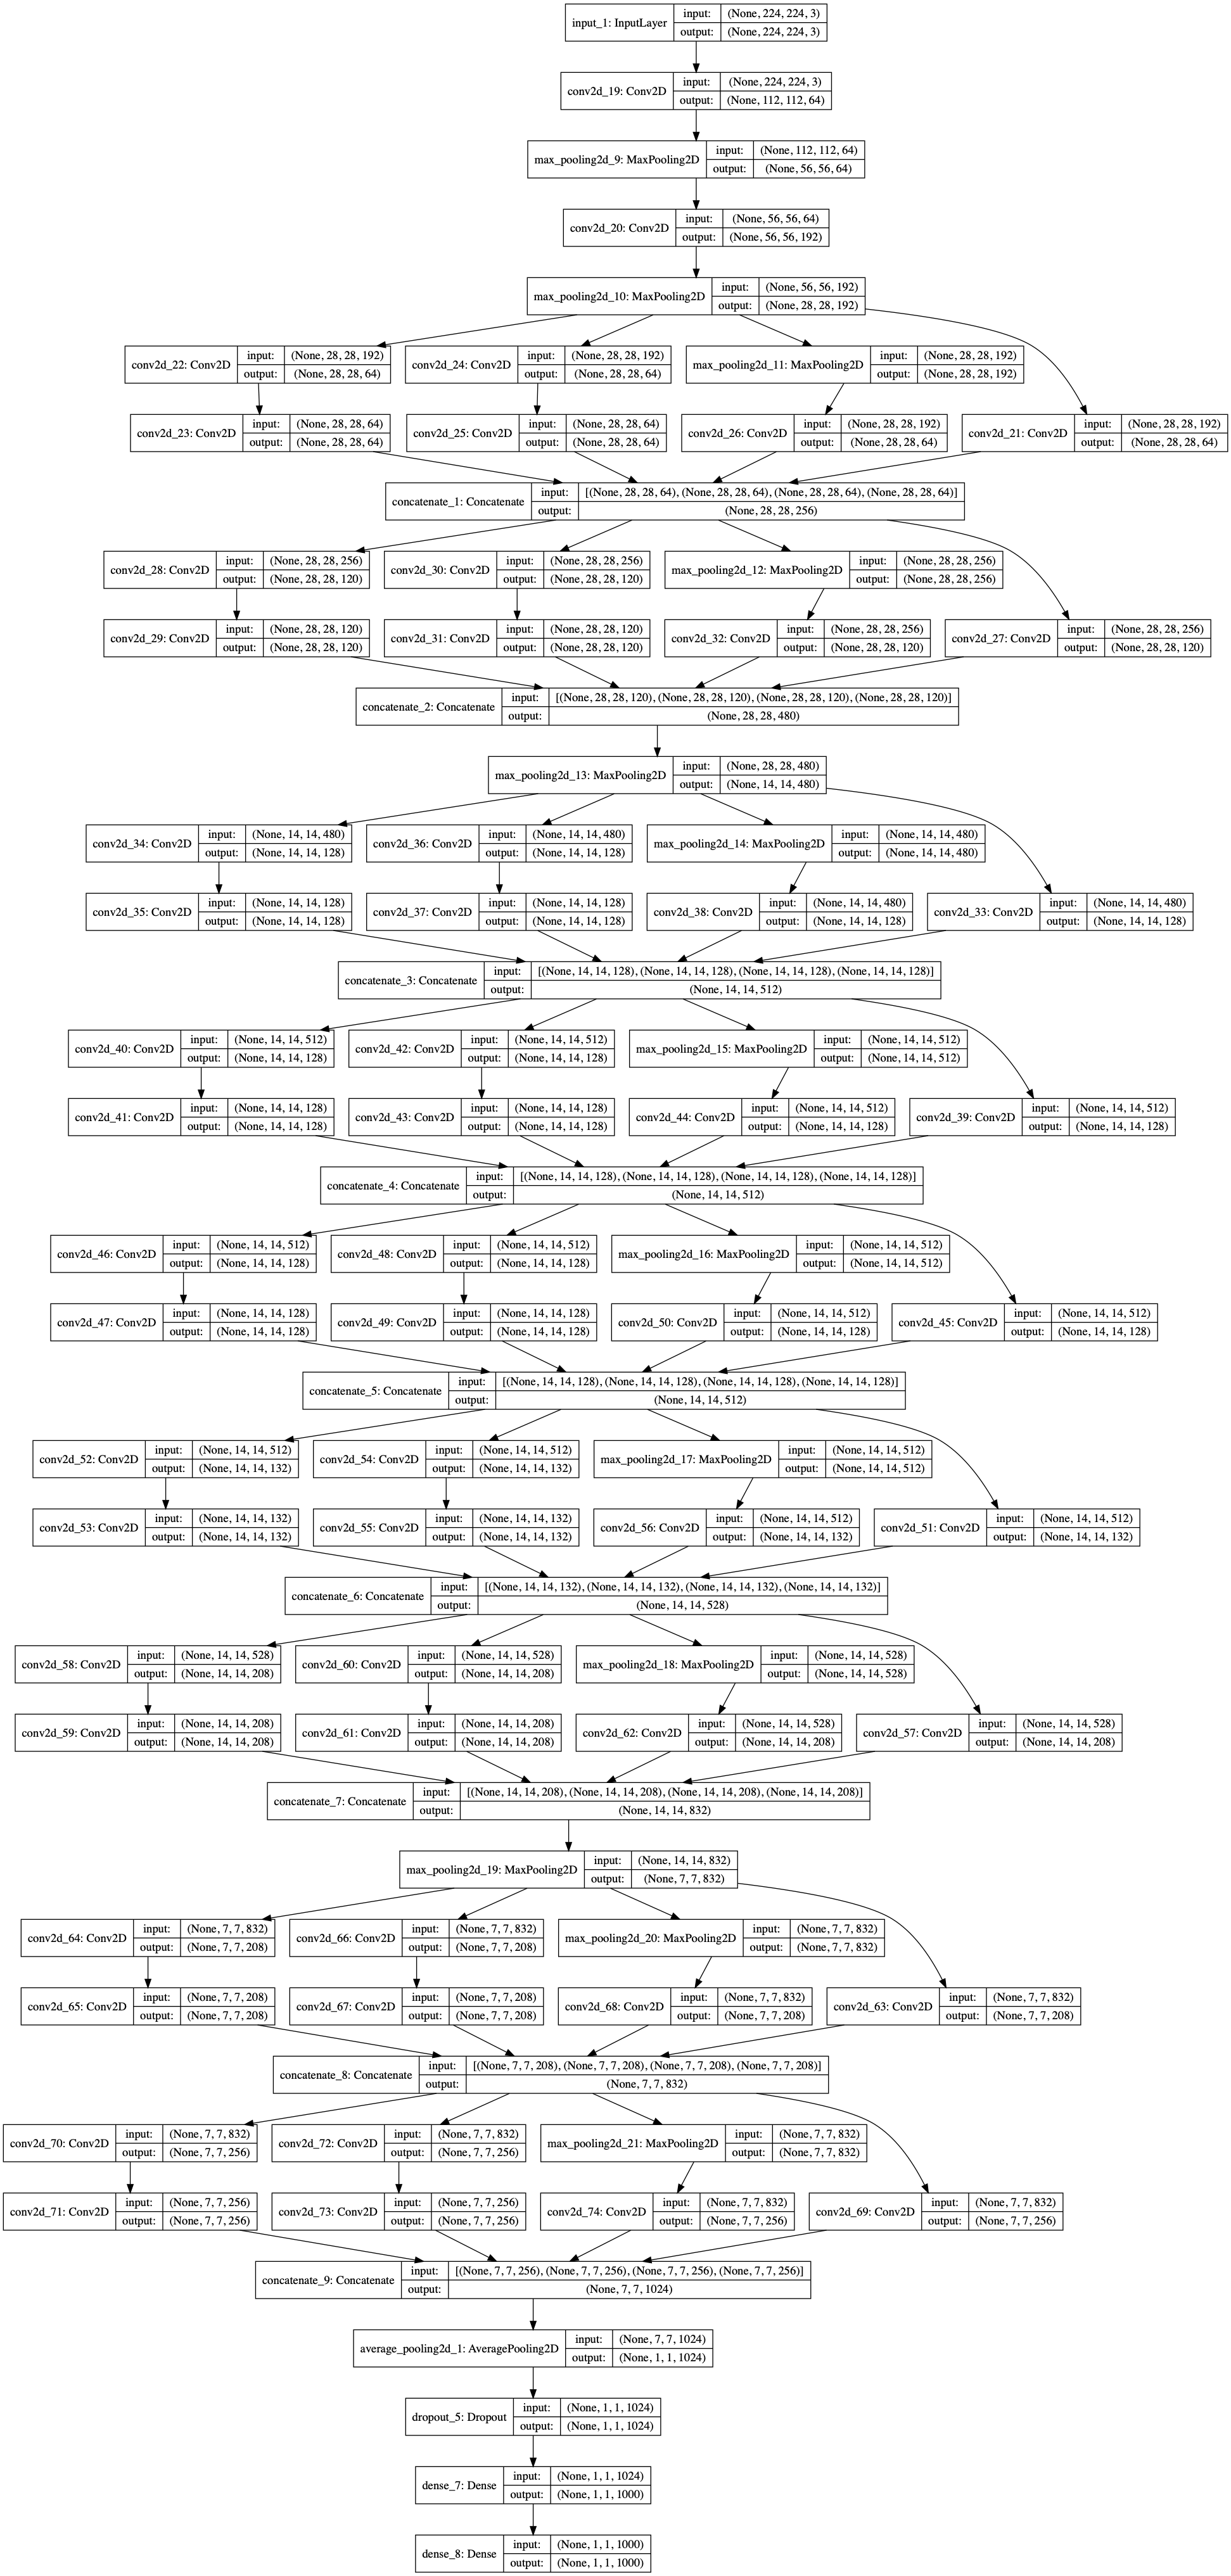

In [5]:
plot_model(model_GoogLeNet, show_shapes=True)

In [ ]:
# ResNet50
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py
# https://github.com/raghakot/keras-resnet/blob/master/README.md

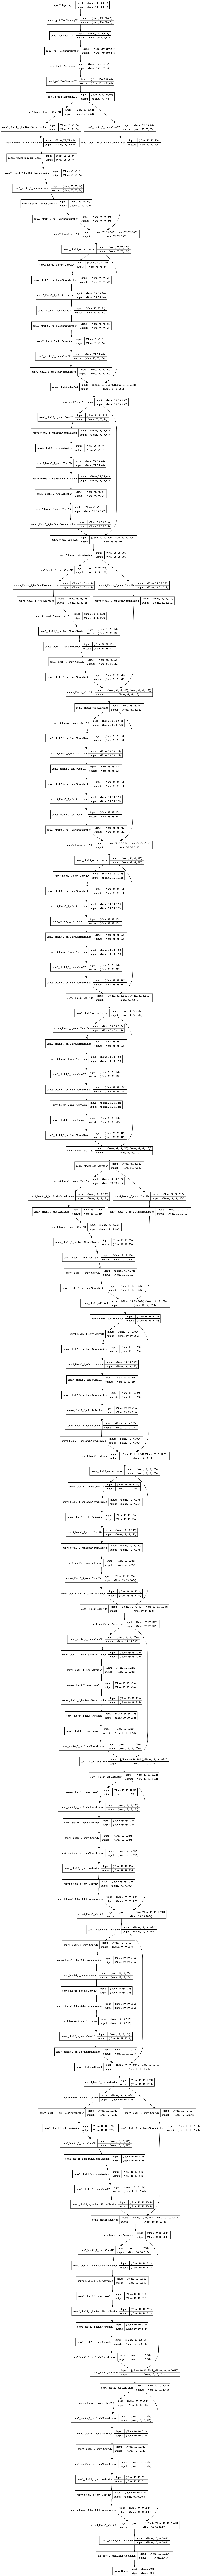

In [6]:
model_ResNet50 = keras.applications.resnet.ResNet50(include_top=True, weights=None, input_shape=(300, 300, 3), classes=1000)
plot_model(model_ResNet50, show_shapes=True)

In [7]:
model_ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________